In [67]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from utils import get_data, get_X_show, get_metrics, get_post


In [68]:
seed = 24
np.random.seed(seed)

# get data
d_x = 10  # number of fourier features
n_train = 5
n_test = 10000
X_train, Y_train, X_train_orig = get_data(d_x=d_x, n_data=n_train)
X_test, Y_test, X_test_orig = get_data(d_x=d_x, n_data=n_test)
X_show, X_show_orig = get_X_show(d_x=d_x)
Y_true=torch.sum(X_show, 1)


# well-specified

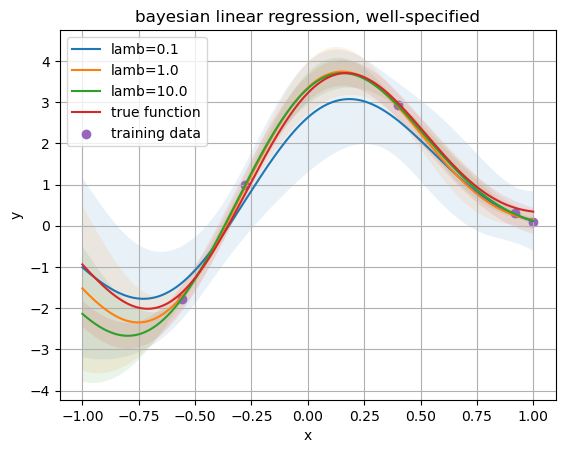

In [69]:
plt.figure()
for lamb in [0.1, 1.0, 10.0]:
    var_likelihood = 0.025
    var_prior = 1.0
    m_N, S_N = get_post(X_train, Y_train, var_prior, var_likelihood, lamb)
    post_pred_mean=X_show @ m_N
    post_pred_var=torch.diag(X_show @ S_N @ X_show.T)
    plt.plot(X_show_orig, post_pred_mean, label=f"lamb={lamb}")
    plt.fill_between(X_show_orig, post_pred_mean + 2 * torch.sqrt(post_pred_var), post_pred_mean - 2 * torch.sqrt(post_pred_var), alpha=0.1)
plt.plot(X_show_orig, Y_true, label="true function")
plt.fill_between(X_show_orig, post_pred_mean + 2 * 0.158, post_pred_mean - 2 * 0.158, alpha=0.1)
plt.scatter(X_train_orig, Y_train, label="training data")
plt.legend()
plt.grid()
plt.title("bayesian linear regression, well-specified")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [78]:
lambs = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [79]:
var_prior = 1.0
var_likelihood = 0.025
result = get_metrics(
    X_train,
    Y_train,
    X_train_orig,
    X_test,
    Y_test,
    X_test_orig,
    var_prior,
    var_likelihood,
    lambs,
)


0.01
0.1
1.0
10.0
100.0
1000.0


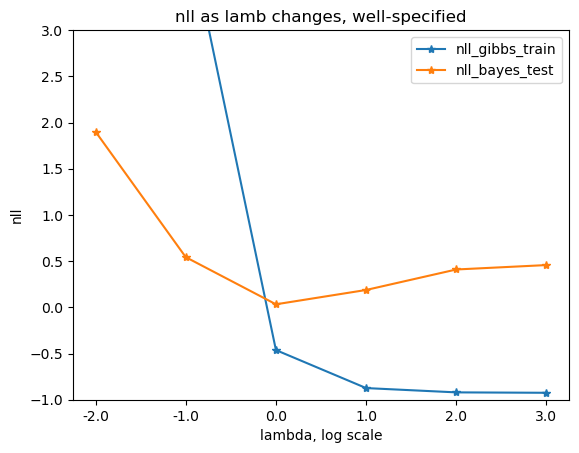

In [80]:
plt.figure()
plt.plot(
    np.arange(0, len(lambs), 1),
    result["nll_gibbs_train"],
    marker="*",
    label="nll_gibbs_train",
)
plt.plot(
    np.arange(0, len(lambs), 1),
    result["nll_bayes_test"],
    marker="*",
    label="nll_bayes_test",
)
plt.legend()
plt.ylim(-1,3)
plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
plt.xlabel("lambda, log scale")
plt.ylabel("nll")
plt.title("nll as lamb changes, well-specified")
plt.show()

# misspecified

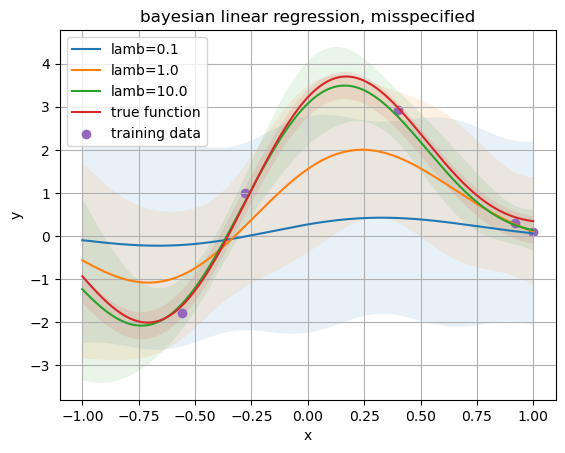

In [74]:
plt.figure()
for lamb in [0.1, 1.0, 10.0]:
    var_likelihood = 1.0
    var_prior = 1.0
    m_N, S_N = get_post(X_train, Y_train, var_prior, var_likelihood, lamb)
    post_pred_mean=X_show @ m_N
    post_pred_var=torch.diag(X_show @ S_N @ X_show.T)
    plt.plot(X_show_orig, post_pred_mean, label=f"lamb={lamb}")
    plt.fill_between(X_show_orig, post_pred_mean + 2 * torch.sqrt(post_pred_var), post_pred_mean - 2 * torch.sqrt(post_pred_var), alpha=0.1)
plt.plot(X_show_orig, Y_true, label="true function")
plt.fill_between(X_show_orig, post_pred_mean + 2 * 0.158, post_pred_mean - 2 * 0.158, alpha=0.1)
plt.scatter(X_train_orig, Y_train, label="training data")
plt.legend()
plt.grid()
plt.title("bayesian linear regression, misspecified")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [81]:
lambs = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


In [82]:
var_prior = 1.0
var_likelihood = 1.0
result = get_metrics(
    X_train,
    Y_train,
    X_train_orig,
    X_test,
    Y_test,
    X_test_orig,
    var_prior,
    var_likelihood,
    lambs,
)

0.01
0.1
1.0
10.0
100.0
1000.0


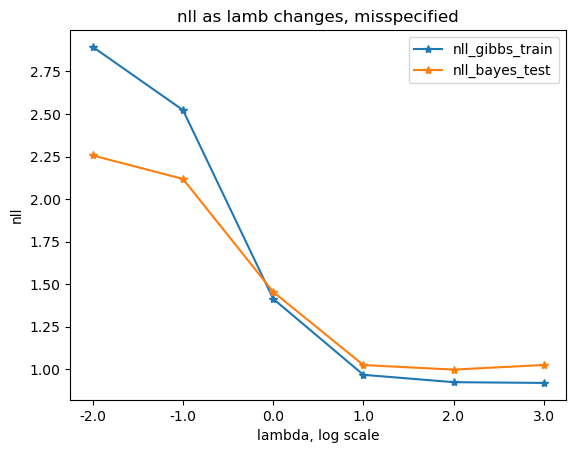

In [83]:
plt.figure()
plt.plot(
    np.arange(0, len(lambs), 1),
    result["nll_gibbs_train"],
    marker="*",
    label="nll_gibbs_train",
)
plt.plot(
    np.arange(0, len(lambs), 1),
    result["nll_bayes_test"],
    marker="*",
    label="nll_bayes_test",
)
plt.legend()
plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
plt.xlabel("lambda, log scale")
plt.ylabel("nll")
plt.title("nll as lamb changes, misspecified")
plt.show()